In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import random
import datetime as dt
import matplotlib.pyplot as plt

from diff_cap_packages import Xy, ta, filters

In [2]:
X, y = Xy.get_market_Xy('930060', percent_change=False, target_ahead_by=0)
display(X.head(), y.head())

vols = Xy.get_volumes_df('data/stock_volumes.csv').fillna(0)
display(vols.head())

info = Xy.get_info_df('data/stock_info.csv')
display(info.head())

,930060,699903,879841,314909,15362F,315452,884570,992762,879650,315449,...,9511Z8,95335N,96147L,9664FT,9664FU,9911WP,9930FR,99142R,2569A8,2579PR
date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,25.5,1.47,5.80,32.08,9.9,6.14,5.63,1.99,1.7,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,25.7,1.47,5.80,32.70,9.8,6.14,5.50,2.04,1.7,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06,25.6,1.47,5.80,33.35,9.8,6.19,5.50,2.13,1.7,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07,25.5,1.47,5.75,35.50,9.8,6.19,5.50,2.20,1.7,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08,25.5,1.47,5.75,34.24,9.8,6.19,5.50,2.18,1.7,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,930060 +0 day
date,
2003-01-02,25.5
2003-01-03,25.7
2003-01-06,25.6
2003-01-07,25.5
2003-01-08,25.5


,930060,699903,879841,314909,15362F,315452,884570,992762,879650,315449,...,9511Z8,95335N,96147L,9664FT,9664FU,9911WP,9930FR,99142R,2569A8,2579PR
date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,173.4,6.6,0.0,358.3,36.1,0.0,1.0,1454.5,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-01-03,10.6,143.5,0.0,729.1,91.8,18.5,13.2,3845.1,0.0,24.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-01-06,81.4,0.0,0.0,1235.6,41.1,1.1,0.0,5645.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-01-07,28.0,13.4,0.0,1286.9,2.2,2.3,83.4,2335.4,1.0,8.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003-01-08,267.0,47.7,0.0,1178.6,24.0,0.2,60.3,171.9,0.1,10.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,MNEM,RIC,ISIN,NAME,ESTAT
Instrument,,,,,
930060,R:AFEJ,AFEJ.J,ZAE000000220,AECI,ACT.
699903,R:AGIJ,AGIJ.J^H13,ZAE000039467,AG INDUSTRIES DEAD - 27/08/13,DEAD
879841,R:AMBJ,NaN,ZAE000029682,AMB DEAD - DEAD 27/10/03,DEAD
314909,R:ABGJ,ABGJ.J,ZAE000255915,ABSA GROUP,ACT.
15362F,R:ACPJ,ACPJ.J^D15,ZAE000188660,ACUCAP PROPERTIES DEAD - 29/04/15,DEAD


In [3]:
X = filters.wipe_dead(X)
X = filters.wipe_nodata(X, min_days=200)
vols = vols[X.columns]
X

,930060,314909,315452,997026,930523,923904,930529,936978,936977,317439,...,8851MH,9405H4,8718CJ,9452XE,86544E,9511Z8,95335N,96147L,9664FT,9664FU
date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,25.50,32.08,6.14,4.00,305.07,135.91,269.24,8.01,39.50,7.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,25.70,32.70,6.14,4.00,305.07,134.84,275.23,8.09,40.00,7.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06,25.60,33.35,6.19,4.00,307.95,132.16,287.64,8.01,40.05,7.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07,25.50,35.50,6.19,4.00,308.92,134.20,279.92,7.90,40.00,7.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08,25.50,34.24,6.19,4.00,313.73,134.82,280.85,7.77,40.05,7.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,99.28,134.00,6.00,9.55,1607.17,574.03,270.27,70.67,250.00,161.27,...,1074.60,116.91,14.30,3.04,3.21,1385.99,484.44,60.47,43.77,43.99
2021-06-25,99.00,135.49,6.02,9.36,1643.54,585.43,264.72,70.62,252.23,159.00,...,1060.02,116.12,14.20,2.92,3.21,1379.04,491.00,59.50,44.25,43.95
2021-06-28,97.65,131.65,5.69,8.85,1639.70,573.64,265.17,70.25,254.27,156.87,...,1053.13,116.58,14.15,2.70,3.90,1396.07,480.00,59.54,43.22,43.69


In [4]:
# stockid = '930060'
stockid = np.random.choice(X.columns)
stock = X.copy()[[stockid]]

In [5]:
def add_all_TA(df):
    ta.add_ATR(df, inplace=True)
    ta.add_RSI(df, inplace=True)
    ta.add_SMA(df, timeperiod=200, inplace=True)
    ta.add_EMA(df, timeperiod=9, inplace=True)
    ta.add_EMA(df, timeperiod=21, inplace=True)
    ta.add_EMA(df, timeperiod=50, inplace=True)
    ta.add_OBV(df, volume=vols[stockid], inplace=True)

In [6]:
# X, y = Xy.get_market_Xy(np.random.choice(X.columns), percent_change=False, target_ahead_by=0)

stock['Volume'] = vols[stockid]
add_all_TA(stock)
stock

,315452,Volume,ATR,RSI,SMA_200,EMA_9,EMA_21,EMA_50,OBV
date,,,,,,,,,
2003-01-02,6.14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2003-01-03,6.14,18.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2003-01-06,6.19,1.1,NaN,NaN,NaN,NaN,NaN,NaN,1.1
2003-01-07,6.19,2.3,NaN,NaN,NaN,NaN,NaN,NaN,1.1
2003-01-08,6.19,0.2,NaN,NaN,NaN,NaN,NaN,NaN,1.1
...,...,...,...,...,...,...,...,...,...
2021-06-24,6.00,2.1,0.087469,35.662095,5.55865,6.117576,6.275945,6.405894,5234.2
2021-06-25,6.02,0.3,0.082650,36.774156,5.57725,6.098061,6.252678,6.390761,5234.5
2021-06-28,5.69,71.1,0.100317,28.133391,5.59570,6.016449,6.201525,6.363280,5163.4


<AxesSubplot:xlabel='date', ylabel='315452'>

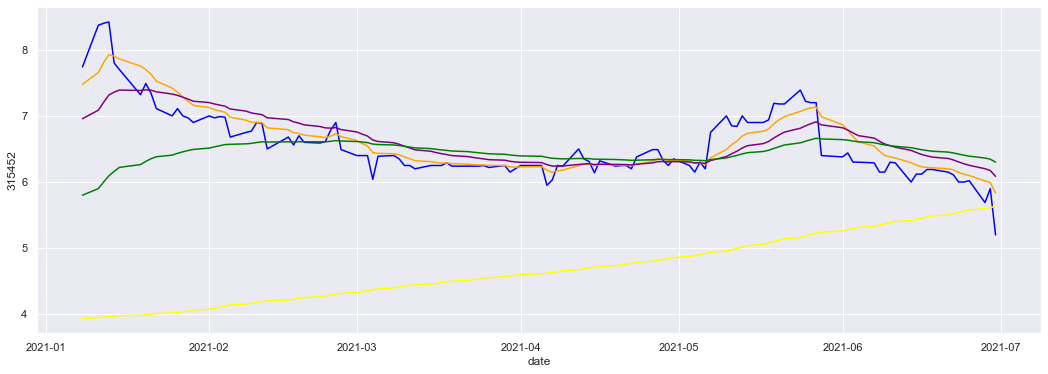

In [7]:
sns.set(rc={"figure.figsize":(18, 6)})
sns.lineplot(data=stock.tail(120), x='date', y=stock.iloc[:, 0], color='blue')
sns.lineplot(data=stock.tail(120), x='date', y='EMA_9', color='orange')
sns.lineplot(data=stock.tail(120), x='date', y='EMA_21', color='purple')
sns.lineplot(data=stock.tail(120), x='date', y='EMA_50', color='green')
sns.lineplot(data=stock.tail(120), x='date', y='SMA_200', color='yellow')

## Trying out PCA then regression

We're using stock.iloc[199:] because the SMA_200 will ALWAYS be N/A if we give anything under 200 days and PCA will not work with N/A values

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_standardized = pd.DataFrame(scaler.fit_transform(stock.iloc[199:].dropna()), columns=stock.columns)
y_standardized

,315452,Volume,ATR,RSI,SMA_200,EMA_9,EMA_21,EMA_50,OBV
0,-1.634381,-0.505442,-1.609836,0.469098,-1.876437,-1.642865,-1.656522,-1.695331,-1.560096
1,-1.634381,-0.505442,-1.636879,0.469098,-1.874843,-1.642361,-1.655744,-1.694196,-1.560096
2,-1.563913,-0.351772,-1.367759,1.933388,-1.872876,-1.627815,-1.648579,-1.690292,-1.553604
3,-1.563913,-0.505442,-1.412093,1.933388,-1.870941,-1.616179,-1.642065,-1.686540,-1.553604
4,-1.563913,-0.349479,-1.453260,1.933388,-1.869007,-1.606869,-1.636144,-1.682935,-1.553604
...,...,...,...,...,...,...,...,...,...
4452,-1.953279,-0.493401,-1.377751,-1.107762,-2.121479,-1.946255,-1.936152,-1.941895,-0.934994
4453,-1.950890,-0.503722,-1.411397,-1.027116,-2.119135,-1.948594,-1.938953,-1.943737,-0.934921
4454,-1.990304,-0.097758,-1.288044,-1.653741,-2.116809,-1.958376,-1.945110,-1.947080,-0.952144
4455,-1.965222,-0.464731,-1.233346,-0.930905,-2.114288,-1.961167,-1.948410,-1.949291,-0.950424


In [9]:
from sklearn.decomposition import PCA
pca = PCA()

pc_scores = pca.fit_transform(y_standardized)
pc_scores = pd.DataFrame(pc_scores, columns=['PC' + str(i) for i in np.arange(1, y_standardized.shape[1] + 1)])
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,4.338958,-0.897030,-0.101188,-0.466595,-0.384766,-0.045510,0.032937,-0.007539,0.000378
1,4.342086,-0.909374,-0.095619,-0.488635,-0.390796,-0.041016,0.033536,-0.007976,0.000397
2,4.278736,-1.870732,0.432729,0.496386,-0.222569,0.136502,0.122287,-0.016994,0.008472
3,4.278647,-1.949073,0.299881,0.458166,-0.243612,0.140427,0.122305,-0.024879,0.005558
4,4.275258,-1.911437,0.453550,0.425768,-0.247535,0.142260,0.123044,-0.031379,0.003490


Text(0.5, 1.0, 'Scree plot')

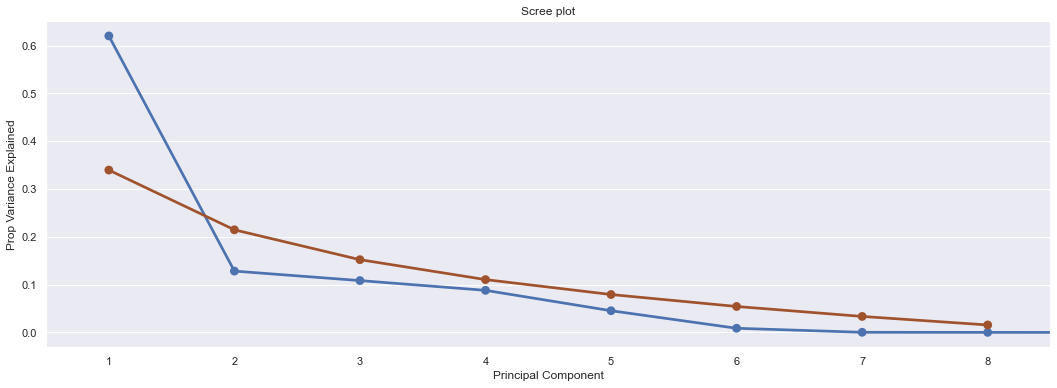

In [10]:
sns.set(rc={"figure.figsize":(8, 4)})

scree_data = pd.DataFrame({'Principal Component': ['1', '2', '3', '4', '5', '6', '7', '8', '9'], 'Prop Variance Explained': pca.explained_variance_ratio_})
sns.set(rc={"figure.figsize":(18, 6)})
sns.pointplot(x='Principal Component', y='Prop Variance Explained', data=scree_data).set_title('Scree plot')

l = []
for i in range(8):
    l.append(1/(i+1))
    
sns.pointplot(x='Principal Component', y='Prop Variance Explained', color='#a0522d', data=pd.DataFrame([{'Principal Component':(i + 1), 'Prop Variance Explained': (np.sum(l[i:8]) / 8)} for i in range(8)])).set_title('Scree plot')

Text(0.5, 1.0, 'Loadings on PC 3')

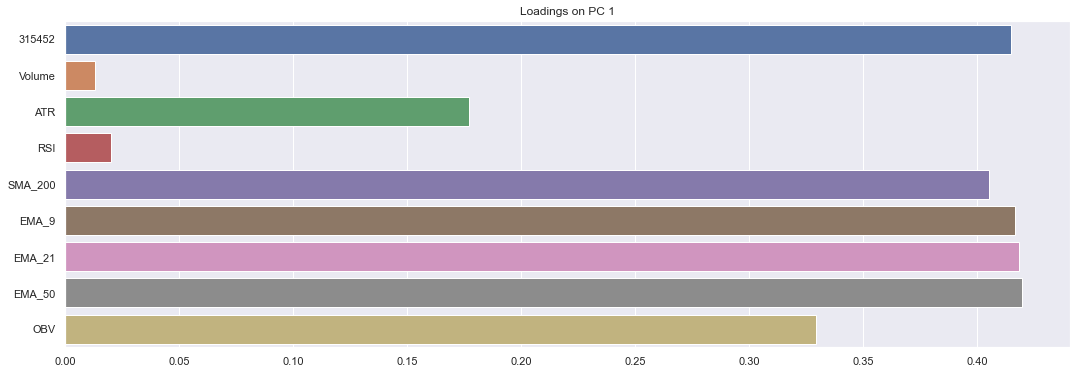

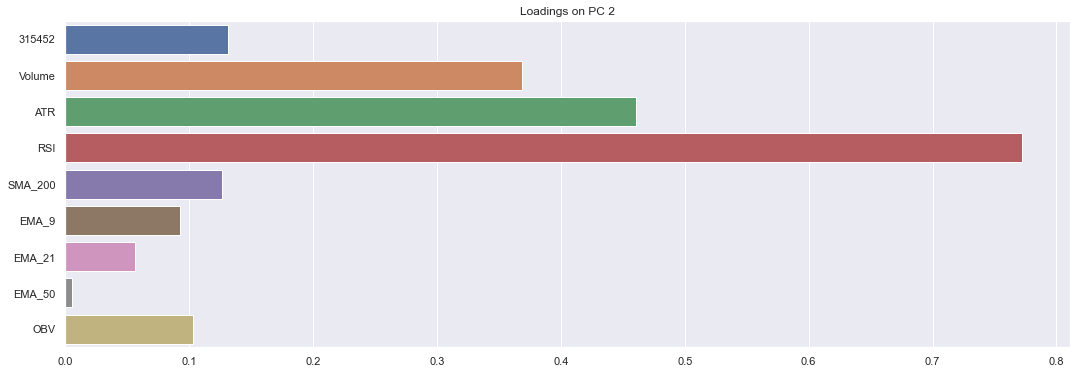

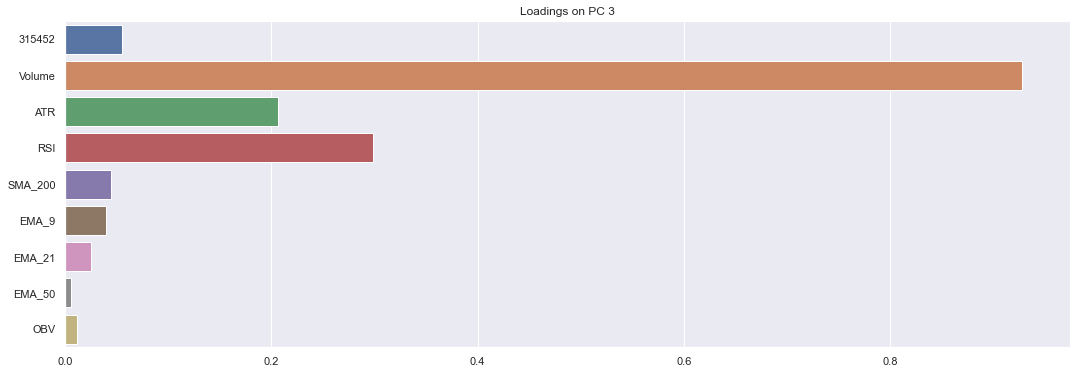

In [11]:
plt.figure(1)
sns.barplot(x=np.abs(pca.components_[0,:]), y=stock.columns, orient='h').set_title('Loadings on PC 1')

plt.figure(2)
sns.barplot(x=np.abs(pca.components_[1,:]), y=stock.columns, orient='h').set_title('Loadings on PC 2')

plt.figure(3)
sns.barplot(x=np.abs(pca.components_[2,:]), y=stock.columns, orient='h').set_title('Loadings on PC 3')

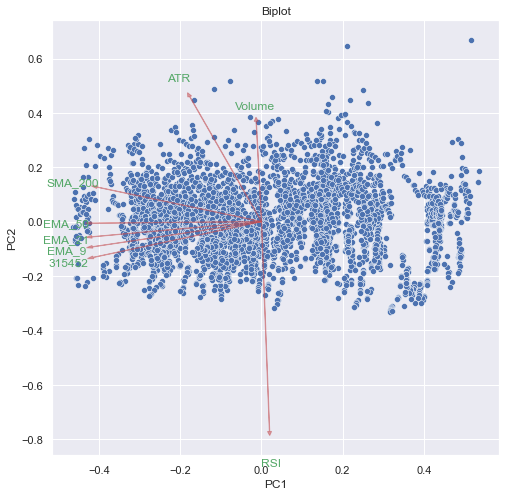

In [12]:
scale1 = 1.0/(pc_scores.PC1.max()-pc_scores.PC1.min())
scale2 = 1.0/(pc_scores.PC2.max()-pc_scores.PC2.min())

plt.figure(figsize=(8, 8))
sns.scatterplot(x=pc_scores.PC1*scale1, y=pc_scores.PC2*scale2).set_title('Biplot')

# adding the coefficients: 
for i in range(8):
    plt.arrow(0, 0, pca.components_[0,i], pca.components_[1,i], color = 'r',alpha = 0.5, head_width=0.01)
    plt.text(pca.components_[0,i]*1.15, pca.components_[1,i]*1.15, stock.columns[i], color = 'g', ha = 'center', va = 'center')

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(stock.iloc[199:].dropna(), test_size=0.2)
train.head()

,315452,Volume,ATR,RSI,SMA_200,EMA_9,EMA_21,EMA_50,OBV
date,,,,,,,,,
2020-09-28,1.74,1.9,0.108087,34.799478,6.28520,1.785466,2.053603,2.549992,6588.3
2011-08-09,25.34,0.0,0.381130,37.889437,26.96540,26.016459,26.454804,26.626824,12976.8
2013-07-02,28.99,55.4,0.313272,49.107237,29.07970,28.951732,29.042167,29.133065,12527.8
2004-03-16,13.16,51.9,0.225664,60.744432,9.85725,12.459015,12.567729,12.224148,2341.1
2011-09-30,24.36,84.3,0.317682,43.691996,26.34570,24.176678,24.673514,25.410460,12471.2


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X=train[['ATR', 'SMA_200', 'EMA_9', 'EMA_21', 'EMA_50', 'OBV']], y=train[stockid])

print('b0:', model.intercept_)
print('coefs:', model.coef_)

b0: 0.04665938553103999
coefs: [ 2.28396396e-03 -6.33170252e-02  2.41908923e+00 -2.05664393e+00
  6.96417851e-01  5.75300961e-06]


In [15]:
y_pred = model.predict(test[['ATR', 'SMA_200', 'EMA_9', 'EMA_21', 'EMA_50', 'OBV']])
y_pred

array([26.34869499, 24.35948492, 38.79024233, 26.26827856, 26.44753815,
       24.49150565, 15.65388108, 20.14002003, 21.93398155, 21.65332214,
       38.98770018, 29.33244276, 31.05979011, 14.90807011, 24.04828268,
       16.18297368, 25.46910857, 25.1864907 , 25.75884172, 35.25827999,
       32.85123083, 31.66856078, 30.42330529, 16.3897708 , 13.3075292 ,
       25.36003274, 34.37167635, 22.37982887, 20.52231106, 13.75155196,
       29.40240503, 26.47574632,  2.89988218, 12.91015417, 31.99629065,
       31.11513771, 13.31551244,  1.65710177, 28.58235393, 22.13054277,
       26.53344004, 28.4804228 , 26.79994685, 21.9947608 , 17.44812002,
       27.22887904, 22.1476612 , 10.81393698, 11.71960446, 31.08211588,
       11.47323683, 27.29516989, 19.059407  , 31.53634996, 33.82277436,
       25.87127291, 17.12492819, 15.3418384 , 23.47020894, 30.90904813,
       25.19804662, 33.04209651, 11.47752705, 22.15432377, 29.69402859,
       30.08925481, 28.65587917, 26.23824505, 17.99730843, 17.13

In [16]:
from sklearn import metrics

print("r2:", metrics.r2_score(y_true=test[stockid], y_pred=y_pred))
print("MSE:", metrics.mean_squared_error(y_true=test[stockid], y_pred=y_pred))
print("MAE:", metrics.mean_absolute_error(y_true=test[stockid], y_pred=y_pred))

r2: 0.9971785280541691
MSE: 0.18776505684583178
MAE: 0.29388790074246857


<AxesSubplot:xlabel='date', ylabel='315452'>

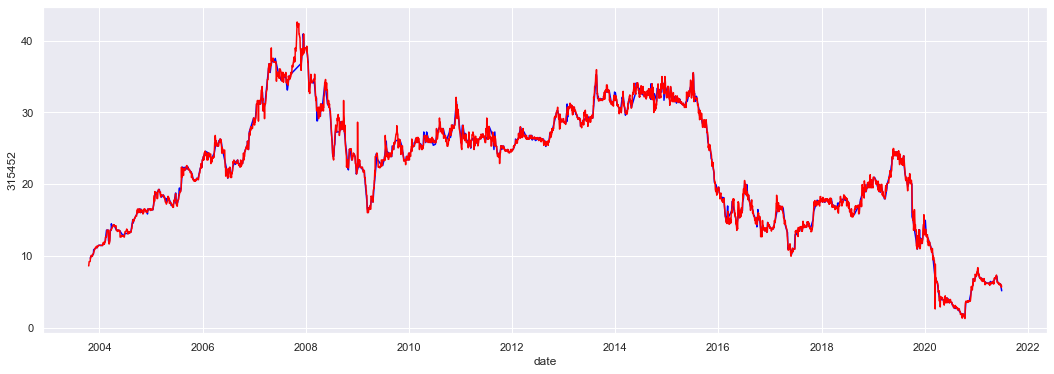

In [17]:
sns.set(rc={"figure.figsize":(18, 6)})
sns.lineplot(data=test.sort_values(by='date'), x='date', y=test.sort_values(by='date')[stockid], color='blue')
sns.lineplot(data=train.sort_values(by='date'), x='date', y=train.sort_values(by='date')[stockid], color='red')

Text(12.085, 0.5, 'predicted price')

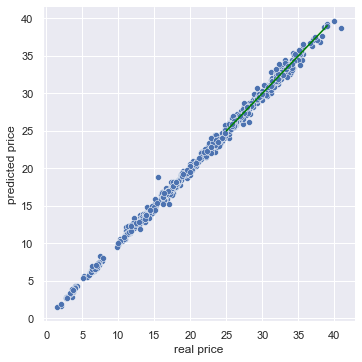

In [20]:
sns.set(rc={"figure.figsize":(10, 6)})

sns.relplot(x=test[stockid], y=y_pred)
plt.plot(np.arange(25, 40), np.arange(25, 40), color='green')
plt.xlabel('real price')
plt.ylabel('predicted price')

In [33]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegModel = RandomForestRegressor(n_estimators=1000, oob_score=True)
RandomForestRegModel.fit(train[['ATR', 'SMA_200', 'EMA_9', 'EMA_21', 'EMA_50', 'OBV']], train[stockid])
y_pred = RandomForestRegModel.predict(test[['ATR', 'SMA_200', 'EMA_9', 'EMA_21', 'EMA_50', 'OBV']])
print('ACCURACY:', metrics.r2_score(test[[stockid]], y_pred))
print(RandomForestRegModel.oob_score_)

ACCURACY: 0.9966927877284972
0.9970559099794574


<AxesSubplot:xlabel='date', ylabel='315452'>

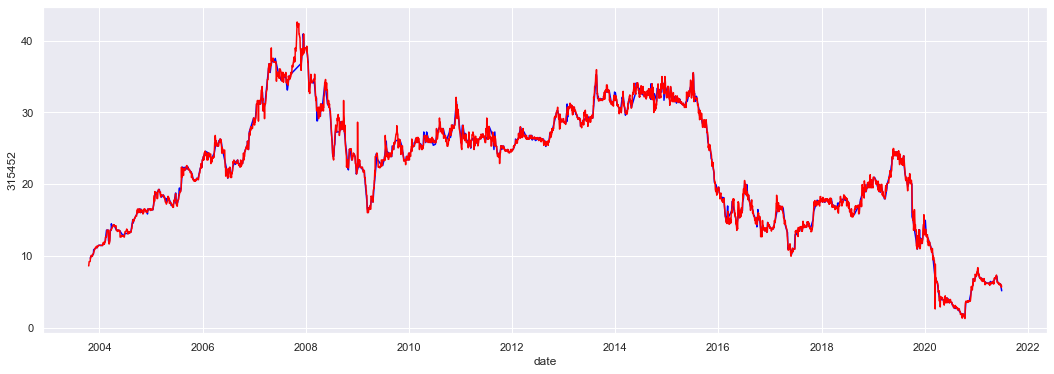

In [32]:
sns.set(rc={"figure.figsize":(18, 6)})
sns.lineplot(data=test.sort_values(by='date'), x='date', y=test.sort_values(by='date')[stockid], color='blue')
sns.lineplot(data=train.sort_values(by='date'), x='date', y=train.sort_values(by='date')[stockid], color='red')